# LAB2: DATA VISUALIZATION & PROCESSING IN PYTHON
In this lab you will practice Python data processing and visualization.


## Step 1: Access the datasets

You can access the data files for `Lab_2` on Canvas in the `Files/Lab 2` section of *TECHIN 510*, and then upload them to your local Jupyter server.
* Robot Faces data set
* People
* Pre-recorded accelerometer data

And you can incorporate them into your code using the sample code in the next cell.


In [3]:
## SAMPLE CODE
import pandas as pd
f1 = 'robot_faces.csv'
f2 = 'people.csv'
f3 = 'accelerometer.csv'
faces = pd.read_csv(f1)
people = pd.read_csv(f2)
accel = pd.read_csv(f3)

In [4]:
faces

,Name,Unnamed: 1,robot type,category,full head,screen type,mouth,nose,eyebrows,cheeks (blush),...,eyebrow length,eyebrow arch,cheek color,cheek shape,cheek size,cheek placement,cheek spacing,hair color,country/region of origin,year
0,Vanessa,7,humanoid,service,y,smart,y,y,y,y,...,med,med,pink,3D,large,cen,close,black,Russia,2010
1,EDGAR,8,humanoid,research,y,back,y,y,y,y,...,med,small,beige,3D,large,up,wide,brown,Singapore,2014
2,FURo-S,8,humanoid,service,y,blcd,y,y,y,y,...,med,small,pink,blush,x,cen,wide,brown,Korea,2015
3,FURo-D,9,humanoid,service,y,blcd,y,y,y,y,...,med,small,pink,blush,NaN,cen,wide,brown,Korea,2015
4,SociBot,9,humanoid,entertainment,y,back,y,y,y,y,...,long,small,peach,3D,med,cen,cen,x,UK,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Baxter (12),51,humanoid,research,x,touch,x,x,x,x,...,x,x,x,x,x,x,x,x,USA,2015
132,Eva,51,humanoid,service,x,blcd,y,x,x,x,...,x,x,x,x,x,x,x,x,China,2015
133,Gongzi Xiaobai,51,humanoid,home,x,blcd,x,x,x,x,...,x,x,x,x,x,x,x,x,China,2016
134,Baidu KFC Robot,53,humanoid,service,x,blcd,x,x,x,x,...,x,x,x,x,x,x,x,x,China,2016


## Step 2: Robot face data exploration

Let's start by exploring the data in `robot_faces.csv`. First, write the code for loading and preprocessing the data. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many robots both have a mouth and a nose?
* Which country has the highest fraction of robots with black face color?
* Do more robots built after 2012 have blue eyes than those built before?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

*If you are interested, you can read more about the face data [here](https://spectrum.ieee.org/automaton/robotics/humanoids/what-people-see-in-157-robot-faces).* 


In [5]:
## TODO: Write code to ask a question about the face data and answer it both visually and programmatically 
has_mouth_and_nose = faces.loc[(faces['mouth'] == 'y') & (faces['nose'] == 'y')]
print(has_mouth_and_nose.shape)

num_robots = has_mouth_and_nose.shape[0]
print("******************** How many robots both have a mouth and a nose? ***********************")
print("Answer ->  ", num_robots)

(28, 77)
******************** How many robots both have a mouth and a nose? ***********************
Answer ->   28


In [6]:
black_face_robots = faces[faces['face color'] == 'black']
print(black_face_robots.head(10))

country_count = black_face_robots.groupby('country/region of origin').size()
total_count = faces.groupby('country/region of origin').size()
print(country_count, ", ", total_count)

fraction = country_count/total_count

# Get the country with the highest fraction
highest_fraction_country = fraction.idxmax()

print("******************** Which country has the highest fraction of robots with black face color? ***********************")
print("Answer -> ", highest_fraction_country)

                        Name  Unnamed: 1  robot type       category full head  \
24                     I-Eng          23  zoomorphic  entertainment         x   
27                     Cally          26  mechanical       research         x   
30  Scorpio Smartphone Robot          27    humanoid  entertainment         x   
41                 Aijia Pro          31    humanoid           home         x   
45        YYD Robot Xiaoyong          31    humanoid           home         x   
57              Yumi (omate)          34    humanoid           home         x   
61                Baxter (7)          35    humanoid       research         x   
67          RoboMe (robot 1)          36    humanoid  entertainment         x   
68                   Robosem          36  mechanical    educational         x   
71           Dragonbot (1-1)          37  zoomorphic  entertainment         x   

   screen type mouth nose eyebrows cheeks (blush)  ... eyebrow length  \
24        blcd     y    y        y 

In [7]:
# faces['year'] = faces['year'].astype(int)
after_2012 = faces[faces['year'] > '2012']
print(after_2012.head(5))
before_2012 = faces[faces['year'] <= '2012']
print(before_2012.head(5))

after_2012_count = after_2012.groupby('eye color').size()['blue']
before_2012_count = before_2012.groupby('eye color').size()['blue']
print(after_2012_count, ", ", before_2012_count)

print("******************** Do more robots built after 2012 have blue eyes than those built before? ***********************")
if after_2012_count > before_2012_count:
    print("Answer -> More robots built after 2012 have blue eyes.")
else:
    print("Answer -> More robots built before 2012 have blue eyes.")

           Name  Unnamed: 1 robot type  category full head screen type mouth  \
1         EDGAR           8   humanoid  research         y        back     y   
2        FURo-S           8   humanoid   service         y        blcd     y   
3        FURo-D           9   humanoid   service         y        blcd     y   
9   IURO/Furhat          13   humanoid  research         y        back     y   
10       Victor          13   humanoid  research         y        blcd     y   

   nose eyebrows cheeks (blush)  ... eyebrow length eyebrow arch cheek color  \
1     y        y              y  ...            med        small       beige   
2     y        y              y  ...            med        small        pink   
3     y        y              y  ...            med        small        pink   
9     y        y              y  ...           long        small      yellow   
10    y        y              y  ...           long        small      yellow   

   cheek shape cheek size cheek placem

## Step 3: Persons data exploration

We continue our exploration of the data by diving into a dataset of notional (100% fake) persons. Just as you did with the Robot data, write the code for loading and preprocessing the Person data. After inspecting the different column names to better understand what the data includes, pose a specific question and write new code to answer that question. Some example questions are:
* How many males are in the data set vs females?
* Who are the oldest people living in Chicago?
* Which city is most popular with people in their 30's?
* What are the top 5 US states represented in the data?

Your code should print the question at the beginning and print the computed answer at the end. Your script should also create at least one visualization that allows a human to answer the same question without having to do calculations.

In [8]:
## TODO: Write code to ask a question about the person data and answer it both visually and programmatically
# Group the data by the 'Gender' column
gender_count = people.groupby('Gender').size()
print(gender_count)

# Print out the number of males and females
print("******************** How many males are in the data set vs females? ***********************")
print("Number of males: ", gender_count['male'])
print("Number of females: ", gender_count['female'])

Gender
female    1484
male      1516
dtype: int64
******************** How many males are in the data set vs females? ***********************
Number of males:  1516
Number of females:  1484


In [9]:
# Filter the dataframe for people living in Chicago
chicago_people = people.loc[people['City'] == 'Chicago']

# Sort the dataframe by age in descending order
chicago_people = chicago_people.sort_values('Age', ascending=False)

# Select the oldest people
oldest_people = chicago_people.head(3)

print("******************** Who are the oldest people living in Chicago? ***********************")
# Print out the oldest people
print(oldest_people)

******************** Who are the oldest people living in Chicago? ***********************
     FirstName  Surname                 Occupation  Age    Birthday  \
1349      John  Uriarte  Service station attendant   82  12/10/1939   
1738     Brian     Hill                 Roustabout   81   1/15/1941   
2666     Karen  Leonard         Charter bus driver   79   3/17/1943   

          StreetAddress     City  ZipCode             EmailAddress  Gender  
1349  4146 Point Street  Chicago    60631  JohnMUriarte@dayrep.com    male  
1738   862 Point Street  Chicago    60647   BrianRHill@fleckens.hu    male  
2666     567 West Drive  Chicago    60606   KarenJLeonard@cuvox.de  female  


In [10]:
# Filter the dataframe for people in their 30's
people_in_30s = people.loc[(people['Age'] >= 30) & (people['Age'] < 40)]

# Group the filtered dataframe by the 'City' column
city_count = people_in_30s.groupby('City').size()
print(city_count)

# Get the city with the most people in their 30's
most_popular_city = city_count.idxmax()

print("******************** Who are the oldest people living in Chicago? ***********************")
print("Answer -> Most popular city for people in their 30s is ", most_popular_city)

City
Akron          1
Albany         4
Albertville    1
Albuquerque    1
Amana          1
              ..
Winthrop       1
Woodland       1
Worcester      1
York           1
Yountville     1
Length: 304, dtype: int64
******************** Who are the oldest people living in Chicago? ***********************
Answer -> Most popular city for people in their 30s is  Philadelphia


In [13]:
from uszipcode import SearchEngine

# Group the data by the 'City' column
city_count = people.groupby('City').size().sort_values(ascending=False)

# Get the top 5 cities
top_cities = city_count.head(5)

print(top_cities)

# top_cities_with_pincode = people.groupby("City").plot()
# print(top_cities_with_pincode)

# Create a search engine object to find zipcode
search = SearchEngine()

print("******************** What are the top 5 US states represented in the data? ***********************")
print("Answer -> The top 5 US states represented in the data are : ")
#Print the top 5 cities and the states they belong to
for city, count in top_cities.items():
    zipcode = people.loc[people['City'] == city, 'ZipCode'].iloc[0]
    result = search.by_zipcode(zipcode)
    print(result.state)

City
New York        53
Los Angeles     46
Philadelphia    40
Houston         35
Chicago         34
dtype: int64
******************** What are the top 5 US states represented in the data? ***********************
Answer -> The top 5 US states represented in the data are : 
NY
CA
PA
TX
IL


## Step 4: Load and visualize accelerometer data

Next you will explore the accelerometer data in `accelerometer.csv` recorded from a mobile device. 

The first thing your Python script should do is open the data file and parse its content into Python lists or arrays. Each row in the data file corresponds to one reading. The first value is the time in seconds, and the next three values are the x, y, z acceleration values from a mobile device accelerometer. Your goal for this part of the lab is to obtain four lists or arrays (of same length) each containing the different columns in the data file.

You can use the `pd.read_csv()`, but if you would like to practice some of the string operations we used during the `chatbot` exercise last week, you can open the file, read its content into a single string, and then use the split() function to split into lines (`data_string.split("\n")`) and elements (`data_string.split(",")`).

Before starting to process the data, visualize it to get a better sense of what is in the data. Keep visualization steps in your script for your lab submission.

In [14]:
## TODO: Code for loading and visualizing accelerometer data

# Get the values of the dataframe as a 2D numpy array
data = accel.values

# Get separate arrays for each column
time = data[:,0]
x = data[:,1]
y = data[:,2]
z = data[:,3]

print(f"Length of time :{len(time)} x :{len(x)} y :{len(y)} z :{len(z)}")
assert len(time) == len(x) == len(y) == len(z), "The lengths of the lists are not equal"

Length of time :211 x :211 y :211 z :211


## Step 5: Detecting lack of movement

As a first data processing exercise, iterate over the lists or arrays you created to compute the: 1) total amount of time; and 2) percentage of time during which the person holding the mobile device was not moving (e.g., absolute acceleration smaller than ~0.2m/sec^2). Visualize parts of the data where lack of movement is detected together with the original data to verify that it works correctly.

In [15]:
## TODO: Code for detecting lack of movement (will be run after running code from Step 3)

total_time = time[len(time)-1] - time[0]
print(f" total_time is {total_time} seconds")



 total_time is 42.00000000000006 seconds


Absolute Acceleration Formula : $\sqrt{x^2 + y^2 + z^2}$

In [16]:
accelerometer = pd.read_csv('accelerometer.csv')

# Calculate the absolute acceleration
accelerometer['absolute_acceleration'] = (accelerometer['x']**2 + accelerometer['y']**2 + accelerometer['z']**2)**0.5

# Determine the rows with absolute acceleration smaller than 0.2
not_moving = accelerometer[accelerometer['absolute_acceleration'] < 0.2]

# Calculate the percentage of time during which the person was not moving
percentage = len(not_moving) / len(accelerometer) * 100

print("Percentage of time during which the person was not moving: {:.2f}%".format(percentage))

Percentage of time during which the person was not moving: 25.12%


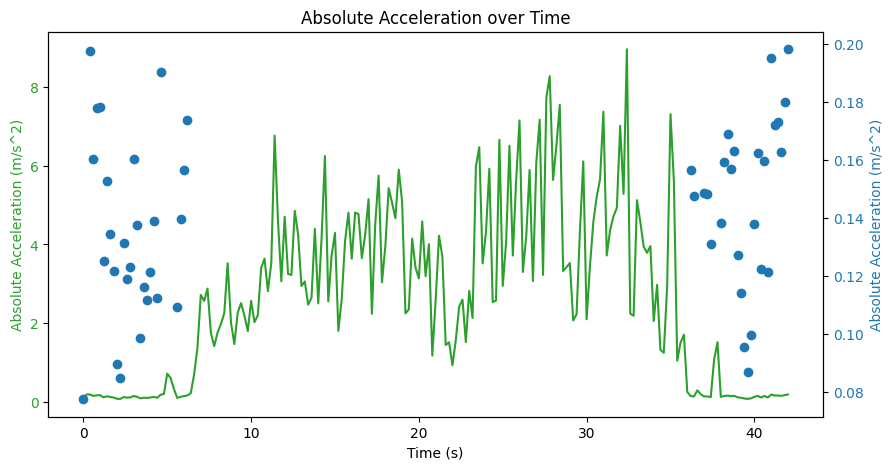

In [17]:
import matplotlib.pyplot as plt

# Create a figure and set the size
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot the original data on the left y-axis
ax1.plot(accelerometer['time'], accelerometer['absolute_acceleration'], color='tab:green')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Absolute Acceleration (m/s^2)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# plot the lack of movement data on the right y-axis
ax2.scatter(not_moving['time'],not_moving['absolute_acceleration'], color='tab:blue')
ax2.set_ylabel('Absolute Acceleration (m/s^2)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add a title to the plot
plt.title('Absolute Acceleration over Time')

# Show the plot
plt.show()

## Step 6: Counting steps

Next you will iterate over the data to count how many steps were taken. There are alternative ways to do that but here we will outline an approximation of the "zero-crossing" method. Walking with an accelerometer results in cyclic patterns characterized by pairs of peaks and valleys in acceleration in some directions. In the provided data you can focus on the z dimension, since the mobile device was held in fixed orientation. To determine the peaks and valleys, iterate over the z values; compare each element in the list to the value of the previous and the next element (note that you cannot do this for the first and last elements of the list); if it is greater than or smaller than both of those, it corresponds to a peak or a valley. Create a separate list, of same length as the data lists, that has the value +1 where peaks occur, -1 where valleys occur, and 0 otherwise. Visualize the peaks and the valleys on the same plot as your data to verify that your algorithm works correctly.

You will see that even very small variations in acceleration cause peaks and valleys, so we need to be stricter in detecting peaks and valleys that correspond to an actual step. For that, you can extend the condition for peaks and valleys to include a threshold on the absolute value (`math.fabs()`) of the acceleration in the z direction (e.g., ~1m/sec^2). Visually inspect the number of peaks and valleys with this stricter criteria. 

A rough approximation of the number of steps would be the `math.min()` of the numbers of peaks and number of valleys. If you are out of time for this lab, you can stop here. However, to count pairs of peaks and valleys more strictly, you need to iterate over the list of peaks and valleys to determine the number of times a peak is followed by a valley (or vice versa) within one second or so (i.e., -1 and 1 separated by no more than four 0s in the peak/valley list). So if you have time, implement counting of pairs as a more accurate approximation of the number of steps. 

Your script should print the counted number of steps on the terminal at the end.

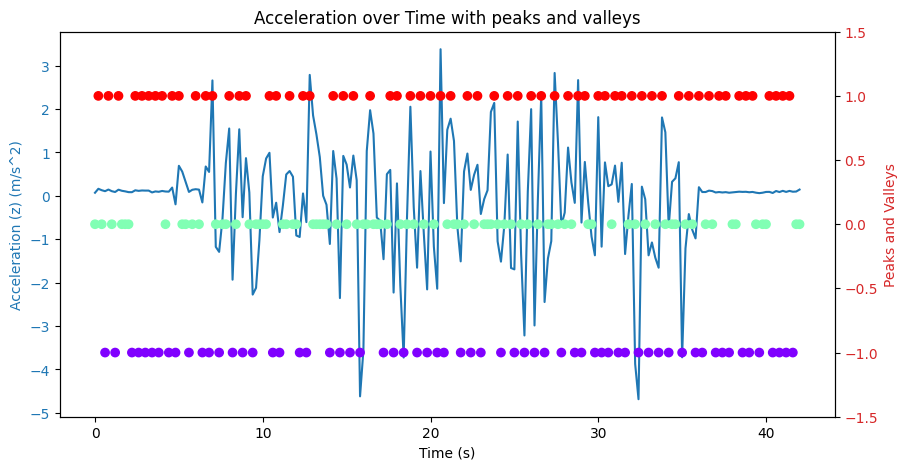

In [18]:
## TODO: Code for counting steps in accelerometer data (will be run after Step 4)
# Create an empty list to store the peaks and valleys
peaks_valleys = []

# Iterate over the z values
for i in range(1, len(accelerometer)-1):
    # Compare each element to the value of the previous and the next element
    if accelerometer.loc[i,'z'] > accelerometer.loc[i-1,'z'] and accelerometer.loc[i,'z'] > accelerometer.loc[i+1,'z']:
        peaks_valleys.append(1)
    elif accelerometer.loc[i,'z'] < accelerometer.loc[i-1,'z'] and accelerometer.loc[i,'z'] < accelerometer.loc[i+1,'z']:
        peaks_valleys.append(-1)
    else:
        peaks_valleys.append(0)

# Add 0 to the first and last element
peaks_valleys.insert(0,0)
peaks_valleys.append(0)
accelerometer['peaks_valleys'] = peaks_valleys

# Create a figure and set the size
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot the original data on the left y-axis
ax1.plot(accelerometer['time'], accelerometer['z'], color='tab:blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Acceleration (z) (m/s^2)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the peaks and valleys on the right y-axis
ax2.scatter(accelerometer['time'], accelerometer['peaks_valleys'], c=accelerometer['peaks_valleys'],cmap='rainbow')
ax2.set_ylabel('Peaks and Valleys', color='tab:red')
ax2.set_ylim(-1.5,1.5)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title to the plot
plt.title('Acceleration over Time with peaks and valleys')

# Show the plot
plt.show()

In [19]:
import math

# Threshold for peaks and valleys
threshold = 1

# Create an empty list to store the peaks and valleys
peaks_valleys = []

# Iterate over the z values
for i in range(1, len(accelerometer)-1):
    # Compare each element to the value of the previous and the next element
    if math.fabs(accelerometer.loc[i,'z']) > threshold and accelerometer.loc[i,'z'] > accelerometer.loc[i-1,'z'] and accelerometer.loc[i,'z'] > accelerometer.loc[i+1,'z']:
        peaks_valleys.append(1)
    elif math.fabs(accelerometer.loc[i,'z']) > threshold and accelerometer.loc[i,'z'] < accelerometer.loc[i-1,'z'] and accelerometer.loc[i,'z'] < accelerometer.loc[i+1,'z']:
        peaks_valleys.append(-1)
    else:
        peaks_valleys.append(0)

# Add 0 to the first and last element
peaks_valleys.insert(0,0)
peaks_valleys.append(0)
accelerometer['peaks_valleys'] = peaks_valleys

# Create a variable to count the number of steps
steps = 0

# Iterate over the peaks and valleys list
for i in range(1, len(peaks_valleys)-4):
    # Check if a peak is followed by a valley
    if peaks_valleys[i] == 1 and peaks_valleys[i+1] == 0 and peaks_valleys[i+2] == 0 and peaks_valleys[i+3] == 0 and peaks_valleys[i+4] == -1:
        steps += 1

# Print the counted number of steps
print("Number of steps:", steps)

Number of steps: 2


## Bonus

If you have extra time on this lab, go over your code and add error checks for things that might go wrong, such as if the data file does not have the expected format or if an operation returns empty lists. Instead of throwing errors in these situations, your script should print informative error messages (remember `try`/`except` clauses). In addition, you can go over your code to refactor it into potentially re-usable functions. Finally, you can use the ipywidgets we covered in class to make your figures interactive. Do this part on the code above and list all the improments you made in the text here.

## Step 7: Submit your code on Canvas

Complete this lab by submitting this file (`lab2.ipynb`) on Canvas, by January 24, 23:59. We will test your code by manually running them and inspecting the code to verify that:
* Your face data analysis prints out a clearly stated question and the answer to the question onto the terminal. The code for computing the answer correctly represents the intended question. It also creates an interpretable visualization of parts of the data that would allow a person to answer the same question.
* Your step counter code visualizes the accelerometer data, clearly showing times where there is no movement and where peaks and valleys are detected by your algorithm. It prints the detected number of steps on the terminal at the end. The detected number is reasonable compared to ground truth and the code corresponds to the described algorithm.

See Canvas for a grading rubric.